##Preparation

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Read Dataset

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1iQYqoDwu1DiclDaTwnB1EeNyLCT7BnJetc7sV8scR30/edit#gid=1866877176'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df_rfm = pd.read_csv(sheet_url_trf)
df_rfm.head()

https://docs.google.com/spreadsheets/d/1iQYqoDwu1DiclDaTwnB1EeNyLCT7BnJetc7sV8scR30/export?format=csv&gid=1866877176


,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
0,74303,59297,Shipped,Karen Schultz,F,Brasil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00 UTC,1,88.0
1,72866,58187,Cancelled,Tina Young,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-06-04 04:58:00 UTC,1,88.0
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00 UTC,4,88.0
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00 UTC,2,120.0
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00 UTC,4,120.0


###Cleanning Dataset

###Make copy dataset before cleanning

In [ ]:
dfc_rfm = df_rfm.copy()
dfc_rfm

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
0,74303,59297,Shipped,Karen Schultz,F,Brasil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00 UTC,1,88.00
1,72866,58187,Cancelled,Tina Young,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-06-04 04:58:00 UTC,1,88.00
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00 UTC,4,88.00
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00 UTC,2,120.00
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00 UTC,4,120.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67821,7696,6218,Shipped,Brandy Griffith,F,United States,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2020-01-03 00:13:00 UTC,4,12.43
67822,11033,8900,Complete,Kristina Ramirez,F,China,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2021-11-20 10:45:00 UTC,3,12.43
67823,53377,42702,Processing,Laurie Branch,F,China,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2021-06-06 07:38:00 UTC,2,12.43
67824,5291,4325,Shipped,Cynthia Hopkins,F,China,Fashion Hoodies & Sweatshirts,Allegra K Ladies Long Sleeve Solid Plush Patch...,10.40,2021-11-15 03:38:00 UTC,4,23.86


In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67826 entries, 0 to 67825
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          67826 non-null  int64  
 1   user_id           67826 non-null  int64  
 2   status            67826 non-null  object 
 3   customer_name     67826 non-null  object 
 4   gender            67826 non-null  object 
 5   country           67826 non-null  object 
 6   product_category  67826 non-null  object 
 7   product_name      67822 non-null  object 
 8   production_cost   67826 non-null  float64
 9   date_of_order     67826 non-null  object 
 10  order_quantity    67826 non-null  int64  
 11  price             67826 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 6.2+ MB


###Remove Irrelevant Value

In [ ]:
dfc_rfm.head()

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
0,74303,59297,Shipped,Karen Schultz,F,Brasil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00 UTC,1,88.0
1,72866,58187,Cancelled,Tina Young,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-06-04 04:58:00 UTC,1,88.0
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00 UTC,4,88.0
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00 UTC,2,120.0
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00 UTC,4,120.0


There are no irrelevant value in dataset, so i didn't removing any value

###Check Missing Value

In [ ]:
dfc_rfm.isna().sum()

order_id            0
user_id             0
status              0
customer_name       0
gender              0
country             0
product_category    0
product_name        4
production_cost     0
date_of_order       0
order_quantity      0
price               0
dtype: int64

Based on missing value check i found 1 missing value in product_name column, so i removed this missing value

In [ ]:
dfc_rfm.dropna(inplace=True)
dfc_rfm.isna().sum()

order_id            0
user_id             0
status              0
customer_name       0
gender              0
country             0
product_category    0
product_name        0
production_cost     0
date_of_order       0
order_quantity      0
price               0
dtype: int64

###Check duplicate value

In [ ]:
dfc_rfm.duplicated().sum()

3

Based on overall duplicate value check found 1 duplicate value so i decided to remove this duplicate

In [ ]:
dfc_rfm.drop_duplicates(inplace=True)
dfc_rfm.duplicated().sum()

0

Second step i need check duplicate in order_id column, because uniqe order_id are needed for futher analysis

In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67819 entries, 0 to 67825
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          67819 non-null  int64  
 1   user_id           67819 non-null  int64  
 2   status            67819 non-null  object 
 3   customer_name     67819 non-null  object 
 4   gender            67819 non-null  object 
 5   country           67819 non-null  object 
 6   product_category  67819 non-null  object 
 7   product_name      67819 non-null  object 
 8   production_cost   67819 non-null  float64
 9   date_of_order     67819 non-null  object 
 10  order_quantity    67819 non-null  int64  
 11  price             67819 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 6.7+ MB


In [ ]:
dfc_rfm[dfc_rfm['order_id'].duplicated()]

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
168,79915,63822,Shipped,Ann Garcia,F,China,Plus,Ozone Women's Mona Linen Socks,7.02,2021-10-02 10:48:00 UTC,4,13.00
188,28800,23171,Processing,Lori Webb,F,China,Plus,Gold Toe Women's 3-Pack 3-Pack Castaway Crew S...,6.83,2021-09-30 04:12:00 UTC,2,14.00
204,12296,9934,Complete,Lisa Saunders,F,Spain,Plus,Gold Toe Women's Fashion Pack E,7.37,2021-12-02 10:54:00 UTC,3,15.00
363,15255,12255,Cancelled,Nicole Dillon,F,Germany,Plus,Vanity Fair Women's Spinslip Full Tailored Sli...,15.60,2021-08-26 12:46:00 UTC,4,30.00
412,115622,92014,Shipped,Jodi Anderson,F,United Kingdom,Plus,Bali Passion For Comfort Minimizer Underwire Bra,18.07,2020-02-26 02:59:00 UTC,3,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67819,90886,72530,Cancelled,Angelica Weber,F,China,Fashion Hoodies & Sweatshirts,Allegra K Ladies Long Sleeve Panda Pattern Kan...,8.10,2021-04-29 14:33:00 UTC,2,18.61
67821,7696,6218,Shipped,Brandy Griffith,F,United States,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2020-01-03 00:13:00 UTC,4,12.43
67822,11033,8900,Complete,Kristina Ramirez,F,China,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2021-11-20 10:45:00 UTC,3,12.43
67823,53377,42702,Processing,Laurie Branch,F,China,Fashion Hoodies & Sweatshirts,Allegra K Women Long Sleeve STOP KILLING WHALE...,5.98,2021-06-06 07:38:00 UTC,2,12.43


Based on that i found 21072 duplicate value from order_id column, so i decide to remove duplicate in order_id column

In [ ]:
dfc_rfm= dfc_rfm.drop_duplicates(['order_id'])
dfc_rfm

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
0,74303,59297,Shipped,Karen Schultz,F,Brasil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00 UTC,1,88.00
1,72866,58187,Cancelled,Tina Young,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-06-04 04:58:00 UTC,1,88.00
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00 UTC,4,88.00
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00 UTC,2,120.00
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00 UTC,4,120.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67815,62873,50365,Shipped,Mark Lee,M,Belgium,Fashion Hoodies & Sweatshirts,Allegra K Mens Long Sleeve 2012 Korea New Fash...,12.09,2021-02-26 17:08:00 UTC,1,20.36
67816,95168,75935,Processing,Tommy Roberts,M,China,Fashion Hoodies & Sweatshirts,Allegra K Mens Long Sleeve 2012 Korea New Fash...,12.09,2020-01-18 18:57:00 UTC,1,20.36
67817,76651,61187,Shipped,Laura Weeks,F,United States,Fashion Hoodies & Sweatshirts,Allegra K Ladies Front Kangaroo Pocket Long Sl...,7.87,2020-11-07 16:10:00 UTC,1,18.61
67820,9954,8058,Processing,Christina Riley,F,Brasil,Fashion Hoodies & Sweatshirts,Allegra K Ladies Long Sleeve Panda Pattern Kan...,8.10,2020-04-25 14:48:00 UTC,1,18.61


###Simplifying order status column

First i want check any typo in order_status column

In [ ]:
dfc_rfm['status'].value_counts()

Shipped       13988
Complete      11685
Processing     9168
Cancelled      7185
Returned       4721
Name: status, dtype: int64

No any typo in order status column, but order status need to simplifed into, complete, shipped, procsesing ,because in this process customer already done make a payment

In [ ]:
dfc_rfm = dfc_rfm.query("status != ('Cancelled','Returned')")
dfc_rfm

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price
0,74303,59297,Shipped,Karen Schultz,F,Brasil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00 UTC,1,88.00
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00 UTC,4,88.00
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00 UTC,2,120.00
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00 UTC,4,120.00
5,79915,63822,Shipped,Ann Garcia,F,China,Clothing Sets,Scrunch Cloth Pants Set / Petite - Only Sale C...,76.50,2021-10-02 10:48:00 UTC,4,129.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67815,62873,50365,Shipped,Mark Lee,M,Belgium,Fashion Hoodies & Sweatshirts,Allegra K Mens Long Sleeve 2012 Korea New Fash...,12.09,2021-02-26 17:08:00 UTC,1,20.36
67816,95168,75935,Processing,Tommy Roberts,M,China,Fashion Hoodies & Sweatshirts,Allegra K Mens Long Sleeve 2012 Korea New Fash...,12.09,2020-01-18 18:57:00 UTC,1,20.36
67817,76651,61187,Shipped,Laura Weeks,F,United States,Fashion Hoodies & Sweatshirts,Allegra K Ladies Front Kangaroo Pocket Long Sl...,7.87,2020-11-07 16:10:00 UTC,1,18.61
67820,9954,8058,Processing,Christina Riley,F,Brasil,Fashion Hoodies & Sweatshirts,Allegra K Ladies Long Sleeve Panda Pattern Kan...,8.10,2020-04-25 14:48:00 UTC,1,18.61


In [ ]:
dfc_rfm['status'].value_counts()

Shipped       13988
Complete      11685
Processing     9168
Name: status, dtype: int64

###Check Typo

In [ ]:
dfc_rfm['country'].value_counts()

China             11734
United States      7744
Brasil             5162
South Korea        1896
France             1620
United Kingdom     1583
Germany            1502
Spain              1432
Japan               853
Australia           780
Belgium             451
Poland               74
Colombia             10
Name: country, dtype: int64

Based on typo check, i found misspeling in brasil, so i repair this misspeling





In [ ]:
dfc_rfm['country'] = dfc_rfm['country'].replace('Brasil', 'Brazil')
dfc_rfm['country'].value_counts()

<ipython-input-17-57b7e7a86c25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_rfm['country'] = dfc_rfm['country'].replace('Brasil', 'Brazil')


China             11734
United States      7744
Brazil             5162
South Korea        1896
France             1620
United Kingdom     1583
Germany            1502
Spain              1432
Japan               853
Australia           780
Belgium             451
Poland               74
Colombia             10
Name: country, dtype: int64

###Check Type of Data

In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34841 entries, 0 to 67825
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          34841 non-null  int64  
 1   user_id           34841 non-null  int64  
 2   status            34841 non-null  object 
 3   customer_name     34841 non-null  object 
 4   gender            34841 non-null  object 
 5   country           34841 non-null  object 
 6   product_category  34841 non-null  object 
 7   product_name      34841 non-null  object 
 8   production_cost   34841 non-null  float64
 9   date_of_order     34841 non-null  object 
 10  order_quantity    34841 non-null  int64  
 11  price             34841 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 3.5+ MB


Based on data type check, i need to change data type of order_id, user_id to string format and date_of_order to date time format

In [ ]:
dfc_rfm['date_of_order'] = pd.to_datetime(dfc_rfm['date_of_order'])
dfc_rfm[["order_id"]] = dfc_rfm[["order_id"]].astype(str)
dfc_rfm[["user_id"]] = dfc_rfm[["user_id"]].astype(str)
dfc_rfm.info()

<ipython-input-19-a729e23bbf91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_rfm['date_of_order'] = pd.to_datetime(dfc_rfm['date_of_order'])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34841 entries, 0 to 67825
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   order_id          34841 non-null  object             
 1   user_id           34841 non-null  object             
 2   status            34841 non-null  object             
 3   customer_name     34841 non-null  object             
 4   gender            34841 non-null  object             
 5   country           34841 non-null  object             
 6   product_category  34841 non-null  object             
 7   product_name      34841 non-null  object             
 8   production_cost   34841 non-null  float64            
 9   date_of_order     34841 non-null  datetime64[ns, UTC]
 10  order_quantity    34841 non-null  int64              
 11  price             34841 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(8)
m

###Manipulating price data

In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34841 entries, 0 to 67825
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   order_id          34841 non-null  object             
 1   user_id           34841 non-null  object             
 2   status            34841 non-null  object             
 3   customer_name     34841 non-null  object             
 4   gender            34841 non-null  object             
 5   country           34841 non-null  object             
 6   product_category  34841 non-null  object             
 7   product_name      34841 non-null  object             
 8   production_cost   34841 non-null  float64            
 9   date_of_order     34841 non-null  datetime64[ns, UTC]
 10  order_quantity    34841 non-null  int64              
 11  price             34841 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(8)
m

I need to search total spend per customer by multipying order_quantity and item price, and total cost by multipying order_quantity and production_cost, for futher analysis

In [ ]:
dfc_rfm['total_spend'] = dfc_rfm['order_quantity'] * dfc_rfm['price']
dfc_rfm['total_cost'] = dfc_rfm['order_quantity'] * dfc_rfm['production_cost']
dfc_rfm.head()

<ipython-input-21-641c4a6262ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_rfm['total_spend'] = dfc_rfm['order_quantity'] * dfc_rfm['price']
<ipython-input-21-641c4a6262ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_rfm['total_cost'] = dfc_rfm['order_quantity'] * dfc_rfm['production_cost']


,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price,total_spend,total_cost
0,74303,59297,Shipped,Karen Schultz,F,Brazil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00+00:00,1,88.0,88.0,53.77
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00+00:00,4,88.0,352.0,215.08
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00+00:00,2,120.0,240.0,160.56
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00+00:00,4,120.0,480.0,321.12
5,79915,63822,Shipped,Ann Garcia,F,China,Clothing Sets,Scrunch Cloth Pants Set / Petite - Only Sale C...,76.50,2021-10-02 10:48:00+00:00,4,129.0,516.0,306.00


##EDA

###Evaluate Descriptive Statistic

In [ ]:
desc_stat = dfc_rfm.describe()
desc_stat

,production_cost,order_quantity,price,total_spend,total_cost
count,34841.000000,34841.000000,34841.000000,34841.000000,34841.000000
mean,28.617710,1.452656,58.820544,85.219777,41.815356
std,30.245166,0.808433,63.721495,107.563461,53.076816
min,0.010000,1.000000,0.020000,0.020000,0.010000
25%,11.550000,1.000000,24.950000,27.950000,13.580000
50%,20.070000,1.000000,39.990000,50.000000,25.300000
75%,34.610000,2.000000,69.500000,99.980000,48.720000
max,557.150000,4.000000,950.000000,2392.000000,1074.580000


In [ ]:
list_col = desc_stat.columns
list_col

Index(['production_cost', 'order_quantity', 'price', 'total_spend',
       'total_cost'],
      dtype='object')

In [ ]:
desc_stat.loc['kurtosis'] = dfc_rfm[list_col].kurtosis()
desc_stat.loc['skewness'] = dfc_rfm[list_col].skew()
desc_stat.loc['variance'] = dfc_rfm[list_col].var()
desc_stat.loc['coofofvariance'] = np.std(dfc_rfm[list_col])/np.mean(dfc_rfm[list_col])
desc_stat

,production_cost,order_quantity,price,total_spend,total_cost
count,34841.000000,34841.000000,34841.000000,34841.000000,34841.000000
mean,28.617710,1.452656,58.820544,85.219777,41.815356
std,30.245166,0.808433,63.721495,107.563461,53.076816
min,0.010000,1.000000,0.020000,0.020000,0.010000
25%,11.550000,1.000000,24.950000,27.950000,13.580000
50%,20.070000,1.000000,39.990000,50.000000,25.300000
75%,34.610000,2.000000,69.500000,99.980000,48.720000
max,557.150000,4.000000,950.000000,2392.000000,1074.580000
kurtosis,48.965034,2.805445,44.881102,41.693074,38.915052
skewness,4.924697,1.884187,4.927496,4.738025,4.683935


Insight of descriptive statistic :

1. The most expensive price is 950
2. Most price item is within a range from 24.95 to 69.5
3. The cheapest price item is 0,00 (promos contained)
4. Average price is 110.69
5. order_quantity data is positve skewed (skewness number >0)


###Number of order per country

In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34841 entries, 0 to 67825
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   order_id          34841 non-null  object             
 1   user_id           34841 non-null  object             
 2   status            34841 non-null  object             
 3   customer_name     34841 non-null  object             
 4   gender            34841 non-null  object             
 5   country           34841 non-null  object             
 6   product_category  34841 non-null  object             
 7   product_name      34841 non-null  object             
 8   production_cost   34841 non-null  float64            
 9   date_of_order     34841 non-null  datetime64[ns, UTC]
 10  order_quantity    34841 non-null  int64              
 11  price             34841 non-null  float64            
 12  total_spend       34841 non-null  float64            
 13  t

In [ ]:
temp = dfc_rfm.groupby('country', as_index=False)['order_id'].count().sort_values(by ='order_id', ascending=False)
temp

,country,order_id
3,China,11734
12,United States,7744
2,Brazil,5162
9,South Korea,1896
5,France,1620
11,United Kingdom,1583
6,Germany,1502
10,Spain,1432
7,Japan,853
0,Australia,780


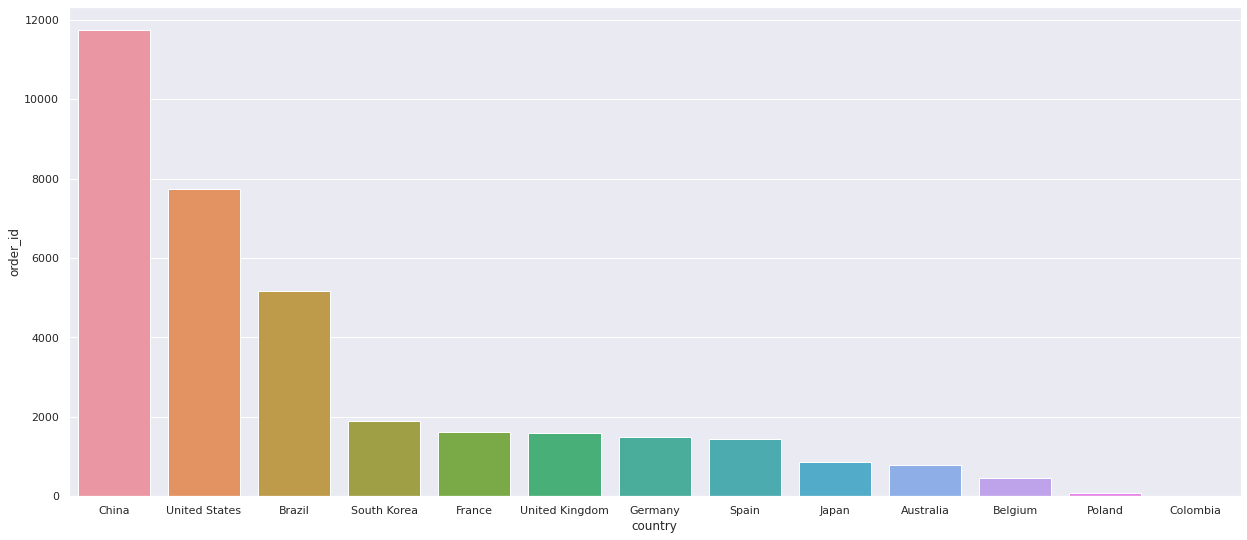

In [ ]:
sns.set(rc={'figure.figsize':(21,9)})
sns.barplot(data=temp, x="country", y="order_id")

###Number of order per product category

In [ ]:
temp = dfc_rfm.groupby('product_category', as_index=False)['order_id'].count().sort_values(by ='order_id', ascending=False)
temp

,product_category,order_id
7,Jeans,3204
23,Swim,3091
6,Intimates,2514
15,Shorts,2363
22,Sweaters,2087
1,Active,1942
24,Tops & Tees,1902
17,Sleep & Lounge,1727
12,Pants,1705
5,Fashion Hoodies & Sweatshirts,1660


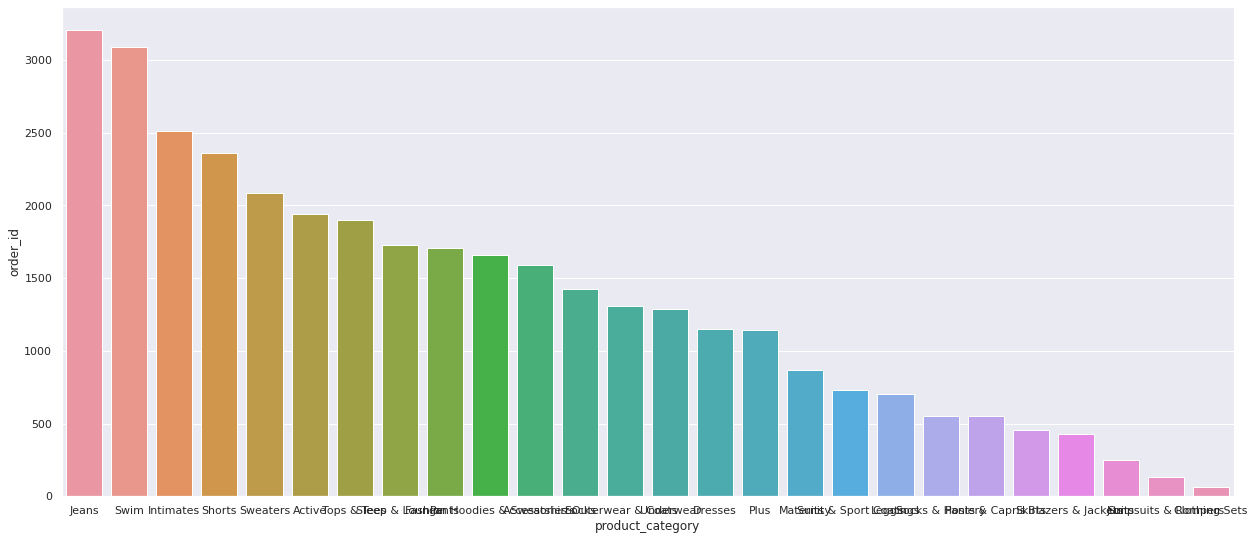

In [ ]:
sns.set(rc={'figure.figsize':(21,9)})
sns.barplot(data=temp, x="product_category", y="order_id")

##RFM Analysis

In this data i define Recency, Frequency and Monetary column as :
*   Recency : Gap between present date and each customer last purchase date
*   Frequency : Count of transaction per customer
*   Monetary : Total money spend per customer



First i want to specify recency column

###Define Recency Column

In [ ]:
dfc_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34841 entries, 0 to 67825
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   order_id          34841 non-null  object             
 1   user_id           34841 non-null  object             
 2   status            34841 non-null  object             
 3   customer_name     34841 non-null  object             
 4   gender            34841 non-null  object             
 5   country           34841 non-null  object             
 6   product_category  34841 non-null  object             
 7   product_name      34841 non-null  object             
 8   production_cost   34841 non-null  float64            
 9   date_of_order     34841 non-null  datetime64[ns, UTC]
 10  order_quantity    34841 non-null  int64              
 11  price             34841 non-null  float64            
 12  total_spend       34841 non-null  float64            
 13  t

In [ ]:
dfc_rfm.head()

,order_id,user_id,status,customer_name,gender,country,product_category,product_name,production_cost,date_of_order,order_quantity,price,total_spend,total_cost
0,74303,59297,Shipped,Karen Schultz,F,Brazil,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2021-04-19 12:29:00+00:00,1,88.0,88.0,53.77
2,95131,75903,Processing,Kathryn Sparks,F,United States,Clothing Sets,Chameleon Convertible Skirt and Dress,53.77,2019-12-20 06:14:00+00:00,4,88.0,352.0,215.08
3,45798,36645,Complete,Molly Gomez,F,China,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-08-22 04:49:00+00:00,2,120.0,240.0,160.56
4,70709,56489,Complete,Cathy Thompson,F,United States,Clothing Sets,N.G.U. Designs 2 piece jacket long skirt spilt...,80.28,2021-02-11 01:28:00+00:00,4,120.0,480.0,321.12
5,79915,63822,Shipped,Ann Garcia,F,China,Clothing Sets,Scrunch Cloth Pants Set / Petite - Only Sale C...,76.50,2021-10-02 10:48:00+00:00,4,129.0,516.0,306.00


In [ ]:
recency_df = dfc_rfm.groupby(by='user_id', as_index=False)['date_of_order'].max()
recency_df.columns = ['user_id','last_purchase_date']
recency_df.head()

,user_id,last_purchase_date
0,1,2020-11-26 07:32:00+00:00
1,10,2021-06-15 05:08:00+00:00
2,10008,2020-02-10 16:16:00+00:00
3,10009,2021-11-22 12:30:00+00:00
4,10010,2021-08-05 16:07:00+00:00


In [ ]:
present = dfc_rfm['date_of_order'].max()
print(present)

2021-12-30 18:52:00+00:00


In [ ]:
recency_df['R'] = recency_df['last_purchase_date'].apply(lambda x: (present - x).days)
recency_df

,user_id,last_purchase_date,R
0,1,2020-11-26 07:32:00+00:00,399
1,10,2021-06-15 05:08:00+00:00,198
2,10008,2020-02-10 16:16:00+00:00,689
3,10009,2021-11-22 12:30:00+00:00,38
4,10010,2021-08-05 16:07:00+00:00,147
...,...,...,...
28159,99983,2021-01-11 15:15:00+00:00,353
28160,99984,2021-09-22 07:56:00+00:00,99
28161,9999,2020-12-13 01:49:00+00:00,382
28162,99991,2020-04-02 07:03:00+00:00,637


In [ ]:
recency_df.drop('last_purchase_date',axis=1,inplace=True)
recency_df

,user_id,R
0,1,399
1,10,198
2,10008,689
3,10009,38
4,10010,147
...,...,...
28159,99983,353
28160,99984,99
28161,9999,382
28162,99991,637


###Define Frequency Column

In [ ]:
frequency_df = dfc_rfm.groupby(by=['user_id'], as_index=False)['order_id'].count()
frequency_df.columns = ['user_id','F']
frequency_df

,user_id,F
0,1,1
1,10,1
2,10008,1
3,10009,1
4,10010,1
...,...,...
28159,99983,1
28160,99984,1
28161,9999,1
28162,99991,1


###Define Monetary Column

In [ ]:
monetary_df = dfc_rfm.groupby(by='user_id',as_index=False).agg({'total_spend': 'sum'})
monetary_df.columns = ['user_id','M']
monetary_df

,user_id,M
0,1,79.99
1,10,11.90
2,10008,180.00
3,10009,119.98
4,10010,69.95
...,...,...
28159,99983,392.36
28160,99984,18.00
28161,9999,34.99
28162,99991,193.95


###Merge Dataset

In [ ]:
temp_df = recency_df.merge(frequency_df,on='user_id')
rfm_df = temp_df.merge(monetary_df,on='user_id')
rfm_df

,user_id,R,F,M
0,1,399,1,79.99
1,10,198,1,11.90
2,10008,689,1,180.00
3,10009,38,1,119.98
4,10010,147,1,69.95
...,...,...,...,...
28159,99983,353,1,392.36
28160,99984,99,1,18.00
28161,9999,382,1,34.99
28162,99991,637,1,193.95


###Handling Outlier

I need check any outlier in R and M column, because this column potentialy contain outlier value 

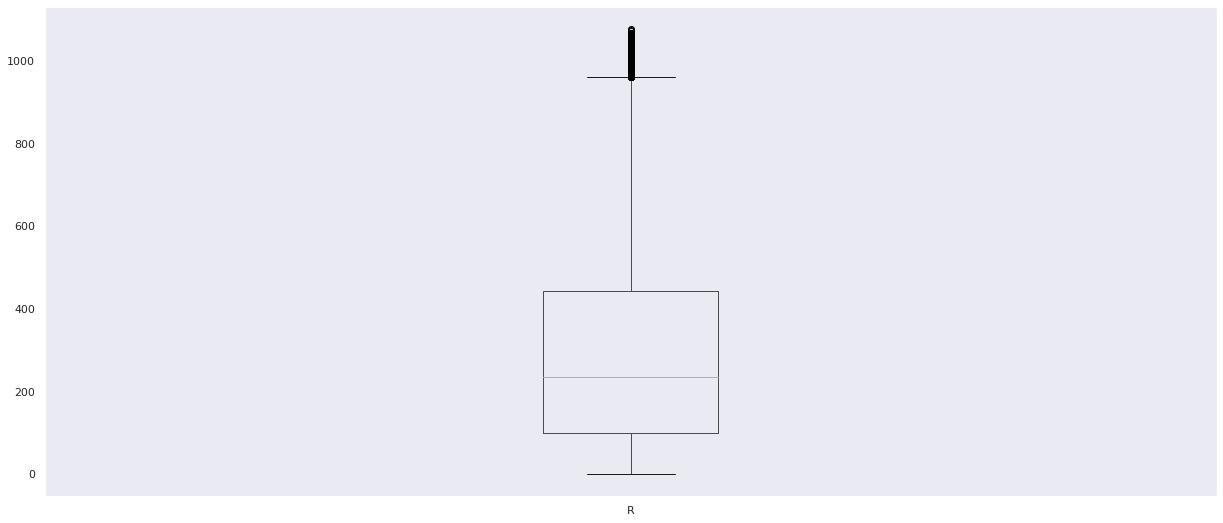

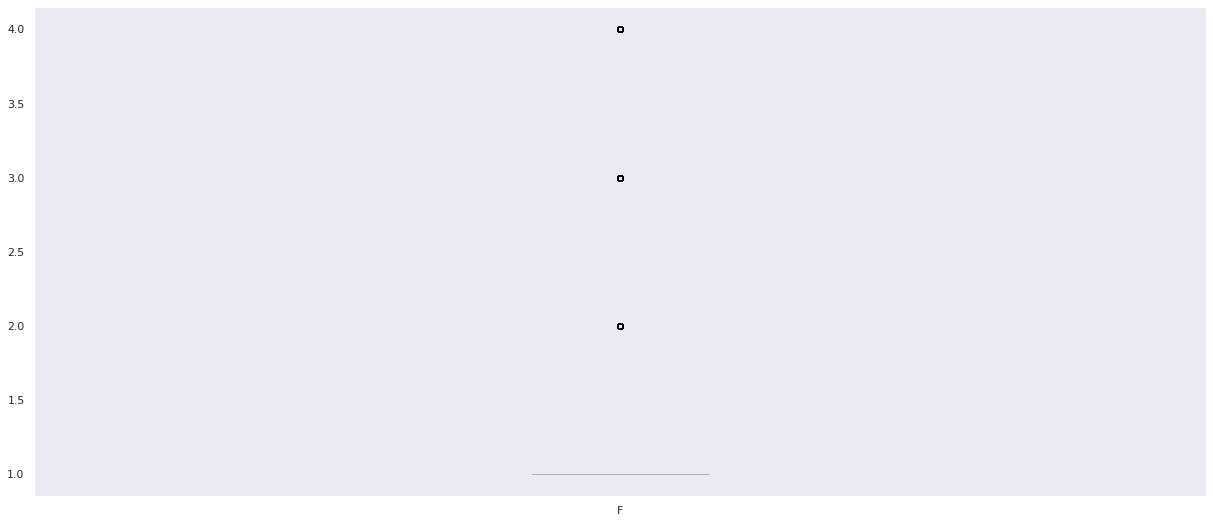

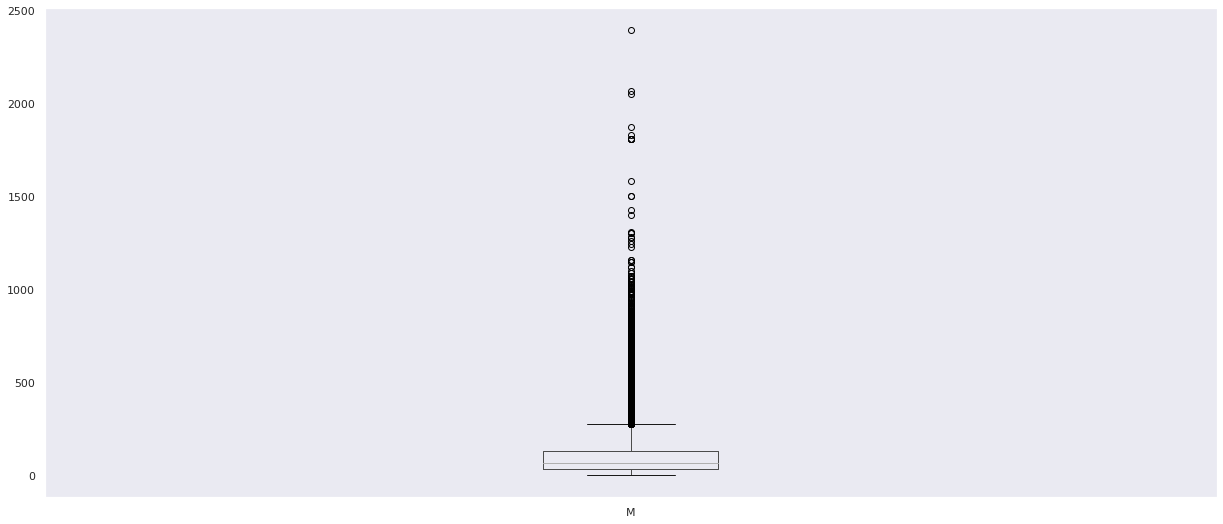

In [ ]:
outliers = ['R','F','M']

for cols in rfm_df[outliers]:
  rfm_df.boxplot(column = [cols])
  plt.grid(False)
  plt.show()

In [ ]:
rfm_df[outliers].describe()

,R,F,M
count,28164.000000,28164.000000,28164.000000
mean,294.932360,1.237076,105.423316
std,238.039315,0.522071,128.251391
min,0.000000,1.000000,0.020000
25%,99.000000,1.000000,32.000000
50%,236.000000,1.000000,63.000000
75%,444.000000,1.000000,129.980000
max,1077.000000,4.000000,2392.000000


In checking outlier value, i using this formula

Upper limit = Q3 + 1.5 * IQR

Lower limit = Q1 - 1.5 * IQR

In [ ]:
def count_outliers(columns_name_with_outliers):
    outliers_list = []
    for i in columns_name_with_outliers:
        low_outliers = rfm_df[i].describe()[4] - 1.5*abs(rfm_df[i].describe()[5] - rfm_df[i].describe()[6])
        upper_outliers =  rfm_df[i].describe()[6] + 1.5*abs(rfm_df[i].describe()[4] - rfm_df[i].describe()[6])
        print(i + f' outliers is < {low_outliers}, and > {upper_outliers}')
        outliers_list.append([i,low_outliers,upper_outliers])
    for i in range(len(outliers_list)):
        outliers_count_bottom = rfm_df[rfm_df[outliers_list[i][0]] < outliers_list[i][1]][outliers_list[i][0]].count()
        outliers_count_upper = rfm_df[rfm_df[outliers_list[i][0]] > outliers_list[i][2]][outliers_list[i][0]].count()
        print(f'numbers outliers in columns {outliers_list[i][0]} is bottom outliers = {outliers_count_bottom} and upper outliers = {outliers_count_upper} ')
count_outliers(outliers)

R outliers is < -213.0, and > 961.5
F outliers is < 1.0, and > 1.0
M outliers is < -68.46999999999998, and > 276.94999999999993
numbers outliers in columns R is bottom outliers = 0 and upper outliers = 209 
numbers outliers in columns F is bottom outliers = 0 and upper outliers = 5525 
numbers outliers in columns M is bottom outliers = 0 and upper outliers = 2101 


Based on outlier checking i want to remove outlier only in column recency and monetary

First we need remove outlier in monetary column

In [ ]:
filter_value_min = rfm_df['M'] < -68.46999999999998
filter_value_max = rfm_df['M'] > 276.94999999999993
rfm_outlier = rfm_df[(filter_value_min|filter_value_max)]
rfm_outlier['M'].count()

2101

In [ ]:
rfm_outlier['M'].count()/rfm_df['M'].count()

0.0745987785825877

Based on outlier check 7% of monetary value is outlier, so i removed this outlier

In [ ]:
rfm_df = rfm_df[~((rfm_df['M'] < -68.46999999999998) | (rfm_df['M'] > 276.94999999999993))]
rfm_df.shape

(26063, 4)

Next we need remove outlier in recency column

In [ ]:
filter_value_min = rfm_df['R'] < -213.0
filter_value_max = rfm_df['R'] > 961.5
rfm_outlier = rfm_df[(filter_value_min|filter_value_max)]
rfm_outlier['R'].count()

194

In [ ]:
rfm_outlier['R'].count()/rfm_df['R'].count()

0.007443502282929824

Based on outlier check 0.7% of monetary value is outlier, so i removed this outlier

In [ ]:
rfm_df = rfm_df[~((rfm_df['R'] < -213.0) | (rfm_df['R'] > 961.5))]
rfm_df.shape

(25869, 4)

We have remove outlier in recency and monetary column, so we can create segment based on score

###Creating RFM Segments

In [ ]:
rfm_df

,user_id,R,F,M
0,1,399,1,79.99
1,10,198,1,11.90
2,10008,689,1,180.00
3,10009,38,1,119.98
4,10010,147,1,69.95
...,...,...,...,...
28158,99977,721,1,10.00
28160,99984,99,1,18.00
28161,9999,382,1,34.99
28162,99991,637,1,193.95


In this case i used pd.qcut function to define rfm score range

In [ ]:
rfm_df["recency_score"]  = pd.qcut(rfm_df['R'], 5, labels=[5, 4, 3, 2, 1])

We need assign frequency column to the parse value

In [ ]:
#Creating a function to parse values
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

In [ ]:
#Apply function to create frequency_score column
rfm_df['frequency_score'] = rfm_df['F'].apply(parse_values)

In [ ]:
rfm_df["monetary_score"] = pd.qcut(rfm_df['M'], 5, labels=[1, 2, 3, 4, 5])
rfm_df

,user_id,R,F,M,recency_score,frequency_score,monetary_score
0,1,399,1,79.99,2,1,4
1,10,198,1,11.90,3,1,1
2,10008,689,1,180.00,1,1,5
3,10009,38,1,119.98,5,1,4
4,10010,147,1,69.95,4,1,3
...,...,...,...,...,...,...,...
28158,99977,721,1,10.00,1,1,1
28160,99984,99,1,18.00,4,1,1
28161,9999,382,1,34.99,2,1,2
28162,99991,637,1,193.95,1,1,5


In [ ]:
rfm_df['rfm_score'] = rfm_df.recency_score.astype(str)+ rfm_df.frequency_score.astype(str) + rfm_df.monetary_score.astype(str)
rfm_df

,user_id,R,F,M,recency_score,frequency_score,monetary_score,rfm_score
0,1,399,1,79.99,2,1,4,214
1,10,198,1,11.90,3,1,1,311
2,10008,689,1,180.00,1,1,5,115
3,10009,38,1,119.98,5,1,4,514
4,10010,147,1,69.95,4,1,3,413
...,...,...,...,...,...,...,...,...
28158,99977,721,1,10.00,1,1,1,111
28160,99984,99,1,18.00,4,1,1,411
28161,9999,382,1,34.99,2,1,2,212
28162,99991,637,1,193.95,1,1,5,115


In [ ]:
rfm_df.to_csv('rfm_data.csv')

In this cate i create rfm segmentation based on bloomreach segmentation model [link to articel](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation), in this case i divided customer into 9 segments, with several adjustment in segment scoring

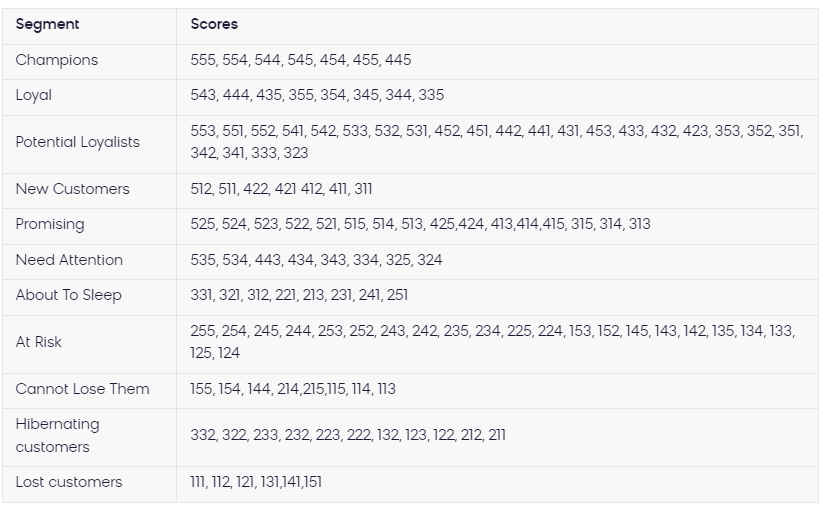

In [ ]:
#Creating dictionary with scores and segment names
segments = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'About To Sleep', 
    r'155|154|144|214|215|115|114|113': 'Hibernating Customers',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'Cannot Lost Them',
    r'331|321|312|221|213|231|241|251': 'At Risk',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313|512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323|535|534|443|434|343|334|325|324': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335' : 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [ ]:
#Creating segment column
rfm_df['segment'] = rfm_df['rfm_score'].replace(segments, regex=True)

#Show results
rfm_df

,user_id,R,F,M,recency_score,frequency_score,monetary_score,rfm_score,segment
0,1,399,1,79.99,2,1,4,214,Hibernating Customers
1,10,198,1,11.90,3,1,1,311,New Customers
2,10008,689,1,180.00,1,1,5,115,Hibernating Customers
3,10009,38,1,119.98,5,1,4,514,New Customers
4,10010,147,1,69.95,4,1,3,413,New Customers
...,...,...,...,...,...,...,...,...,...
28158,99977,721,1,10.00,1,1,1,111,Lost customers
28160,99984,99,1,18.00,4,1,1,411,New Customers
28161,9999,382,1,34.99,2,1,2,212,About To Sleep
28162,99991,637,1,193.95,1,1,5,115,Hibernating Customers


In [ ]:
rfm_df[["segment", "R","F","M"]].groupby("segment").agg(["mean","count"]).round()

R           F             M       
                        mean  count mean  count   mean  count
segment                                                      
About To Sleep         402.0   2409  1.0   2409   30.0   2409
At Risk                312.0   1920  1.0   1920   46.0   1920
Cannot Lost Them       473.0    961  2.0    961  149.0    961
Champions               84.0     47  4.0     47  197.0     47
Hibernating Customers  575.0   3881  1.0   3881  114.0   3881
Lost customers         670.0   2228  1.0   2228   26.0   2228
Loyal                  179.0    212  3.0    212  195.0    212
New Customers          119.0  13029  1.0  13029   77.0  13029
Potential Loyalist     183.0   1182  2.0   1182  123.0   1182

Merge rfm_df to dfc_rfm

In [ ]:
dfc_rfm_viz = pd.merge (dfc_rfm,rfm_df,on ='user_id',how='inner')
dfc_rfm_viz.to_csv('dfc_rfm_tableau_2.csv')

##Intepretating RFM Segments

About to sleep : 
1.   There are 2409 customer in this segment
2.   Most customer has done shopping 402 days ago
3.   Average money spend per customer is 30
4.   Average of customer has do shopping 1 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who rarely made a purchase and have low monetary,and doesn't make transaction over a long period** based on that we need send them personalized email, and we can providing spesific discount in purchase of certain product

At risk : 
1.   There are 1920 customer in this segment
2.   Most customer has done shopping 312 days ago
3.   Average money spend per customer is 46
4.   Average of customer has do shopping 1 times 

Recomendation : Based on this intepretation of segments,this segment contain **customer who rarely make a purchase, and didn't make a transaction in long period,** we need persuade the customer to back make purchase by providing them discount in several items and send personalized mail

Cannot Lose Them :
1.   There are 961 customer in this segment
2.   Most customer has done shopping 473 days ago
3.   Average money spend per customer is 149
4.   Average of customer has do shopping 2 times 

Recomendation : Based on this intepretation of segments,this segment contain **customer who often make a purchase and have high monetary, but this customer doesn't make transaction over a long period,** we need persuade the customer to back make purchase in this store, by asking them is there something wrong in terms of service and so on, and provide several retention strategy like : provide special discount or cashback, and provide recomendation of item purchased base on previous activity 

Champions : 
1.   There are 47 customer in this segment
2.   Most customer has done shopping 84 days ago
3.   Average money spend per customer is 197
4.   Average of customer has do shopping 4 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who often make a purchase, have high monetary and do recent transaction,** based on that we can provide them loyality program and we can asked this segment feedback of services,products etc,and we can provides them refferal program, so customer get a margin of profit, if customer bringing new customer to make a purchase in this ecommerce, so customer feel comfortable shopping in this ecommerce



Hibernating Customers : 
1.   There are 3881 customer in this segment
2.   Most customer has done shopping 575 days ago
3.   Average money spend per customer is 114
4.   Average of customer has do shopping 1 times 

Recomendation : Based on this intepretation of segments,this segment contain **customer who rarely made a purchase and have high monetary,and doesn't make transaction over a long period** based on that we can send personalized email in this segment, but we must ensure consumers do not mark emails as spam and we didn't overspend in adversting in this group, because this segment generate small percentage in revenue

Lost customers : 
1.   There are 2228 customer in this segment
2.   Most customer has done shopping 670 days ago
3.   Average money spend per customer is 30
4.   Average of customer has do shopping 1 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who rarely made a purchase and have low monetary, and didn't make transaction over a very long period** . Same on hibernating segment, we didn't overspend in campagin or adversting in this, because this segment generate very small percentage in revenue

Loyal : 
1.   There are 212 customer in this segment
2.   Most customer has done shopping 179 days ago
3.   Average money spend per customer is 195
4.   Average of customer has do shopping 3 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who often made a purchase and have high monetary, and  do recent purchase** . Based on that based on that we can provide them loyality program and we can asked this segment feedback of services,products etc, so hopefully customer can be more comfortable in do shopping activity

New Customers : 
1.   There are 13209 customer in this segment
2.   Most customer has done shopping 119 days ago
3.   Average money spend per customer is 77
4.   Average of customer has do shopping 1 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who first time made a purchase and have low monetary** . Based on that we can provide discount in purchases of spesific product, and we can start build communication on this segment, by asking satisfication surveys based on recent order, based on that we get better awareness of who these customers are and what they want.

Potential Loyalist : 
1.   There are 1182 customer in this segment
2.   Most customer has done shopping 183 days ago
3.   Average money spend per customer is 123
4.   Average of customer has do shopping 2 times 


Recomendation : Based on this intepretation of segments,this segment contain **customer who often made a purchase but not frequently as a loyal segment and have high monetary** . Based on that we can provide special discount in certain product to this segment, and introduce them to loyality program and we can give recomendation of product based on recent purchases